In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn import utils

### Deskripsi Fitur


1. sex : jenis kelamin, laki-laki dan perempuan.

2. age : usia (mengambil batas bawah interval, cth: 20-24 tahun -> 20 tahun).

3. height : tinggi badan, dengan kelipatan 5cm.
4. weight : berat badan, dengan kelipatan 5kg.
5. waistline : lingkar pinggang.
6. sight_left : penglihatan (kiri)
7. sight_right : penglihatan (kanan)
8. hear_left : pendengaran (kiri), nilai 1 (normal), 2 (tidak normal).
9. hear_right :pendengaran (kanan), nilai 1 (normal), 2 (tidak normal).

10. SBP : tekanan darah sistolik (mmHg)
11. DBP : tekanan darah diastolik (mmHg)

12. BLDS : 	BLDS or FSG(fasting blood glucose) [mg/dL]. Ini mewakili konsentrasi glukosa per 100ml darah sebelum makan.

13. tot_chole : mengukur konsentrasi total kolesterol (ester dan non-ester), dalam mg/dL.
14. HDL_chole : mengukur konsentrasi total kolesterol di wilayah HDL (high-density lipoprotein), dalam mg/dL. Kolesterol HDL, juga disebut kolesterol baik, menyerap kolesterol dalam darah dan membawanya kembali ke hati, yang kemudian mengeluarkannya dari tubuh. Perhatikan bahwa nilai kolesterol HDL yang lebih tinggi dapat menurunkan risiko penyakit jantung.
15. LDL_chole : mengukur konsentrasi total kolesterol di wilayah LDL (low-density lipoprotein), dalam mg/dL. Kolestorol LDL, juga disebut kolesterol jahat, membentuk sebagian besar kolesterol tubuh. Kadar yang tinggi dapat meningkatkan risiko penyakit jantung dan stroke.

16. triglyceride : mengukur konsentrasi total triglyceride dalam darah seseorang [mg/dL]. Triglyceride adalah sejenis lipid (yaitu lemak) yang bersirkulasi dalam darah, dan biasanya berasal dari makanan yang kita konsumsi.

17. hemoglobin : Hemoglobin adalah protein dalam sel darah merah yang membawa oksigen [g/dL]

18. urine_protein : jumlah protein dalam urin.

19. serum_creatine : serum(blood) creatinine[mg/dL]

20. SGOT_AST : SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]

21. SGOT_ALT : ALT(Alanine transaminase)[IU/L]

22. gamma_GTP : y-glutamyl transpeptidase[IU/L]

23. SMK_STAT_TYPE_CD : keadaan merokok, dimana 1 (tidak pernah merokok), 2 (pernah merokok tapi berhenti), 3 (masih merokok).

24. DRK_YN : Peminum atau tidak peminum

# EDA

In [ ]:
df_ori = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/dataset/smoking_driking_dataset_Ver01.csv")
df_ori.tail(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N
991345,Male,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0,Y


In [ ]:
df_ori.shape

(991346, 24)

## distribusi data (pie chart)

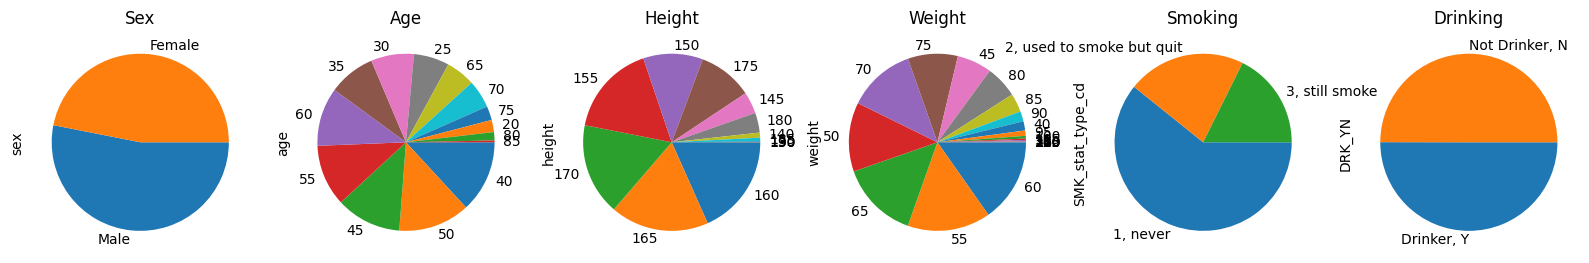

In [ ]:
# Data Distribution

plt.figure(figsize=(20,20))

plt.subplot(1, 6, 1)
df_ori['sex'].value_counts().plot.pie(counterclock=False)
plt.title('Sex')

plt.subplot(1, 6, 2)
df_ori['age'].value_counts().plot.pie(counterclock=False)
plt.title('Age')

plt.subplot(1, 6, 3)
df_ori['height'].value_counts().plot.pie(counterclock=False)
plt.title('Height')

plt.subplot(1, 6, 4)
df_ori['weight'].value_counts().plot.pie(counterclock=False)
plt.title('Weight')

plt.subplot(1, 6, 5)
labels = ['1, never', '2, used to smoke but quit', '3, still smoke']
df_ori['SMK_stat_type_cd'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Smoking')

plt.subplot(1, 6, 6)
labels = ['Drinker, Y', 'Not Drinker, N']
df_ori['DRK_YN'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Drinking')



plt.show()

In [ ]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2  # Menentukan jumlah baris dalam grid subplot

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

## boxplot

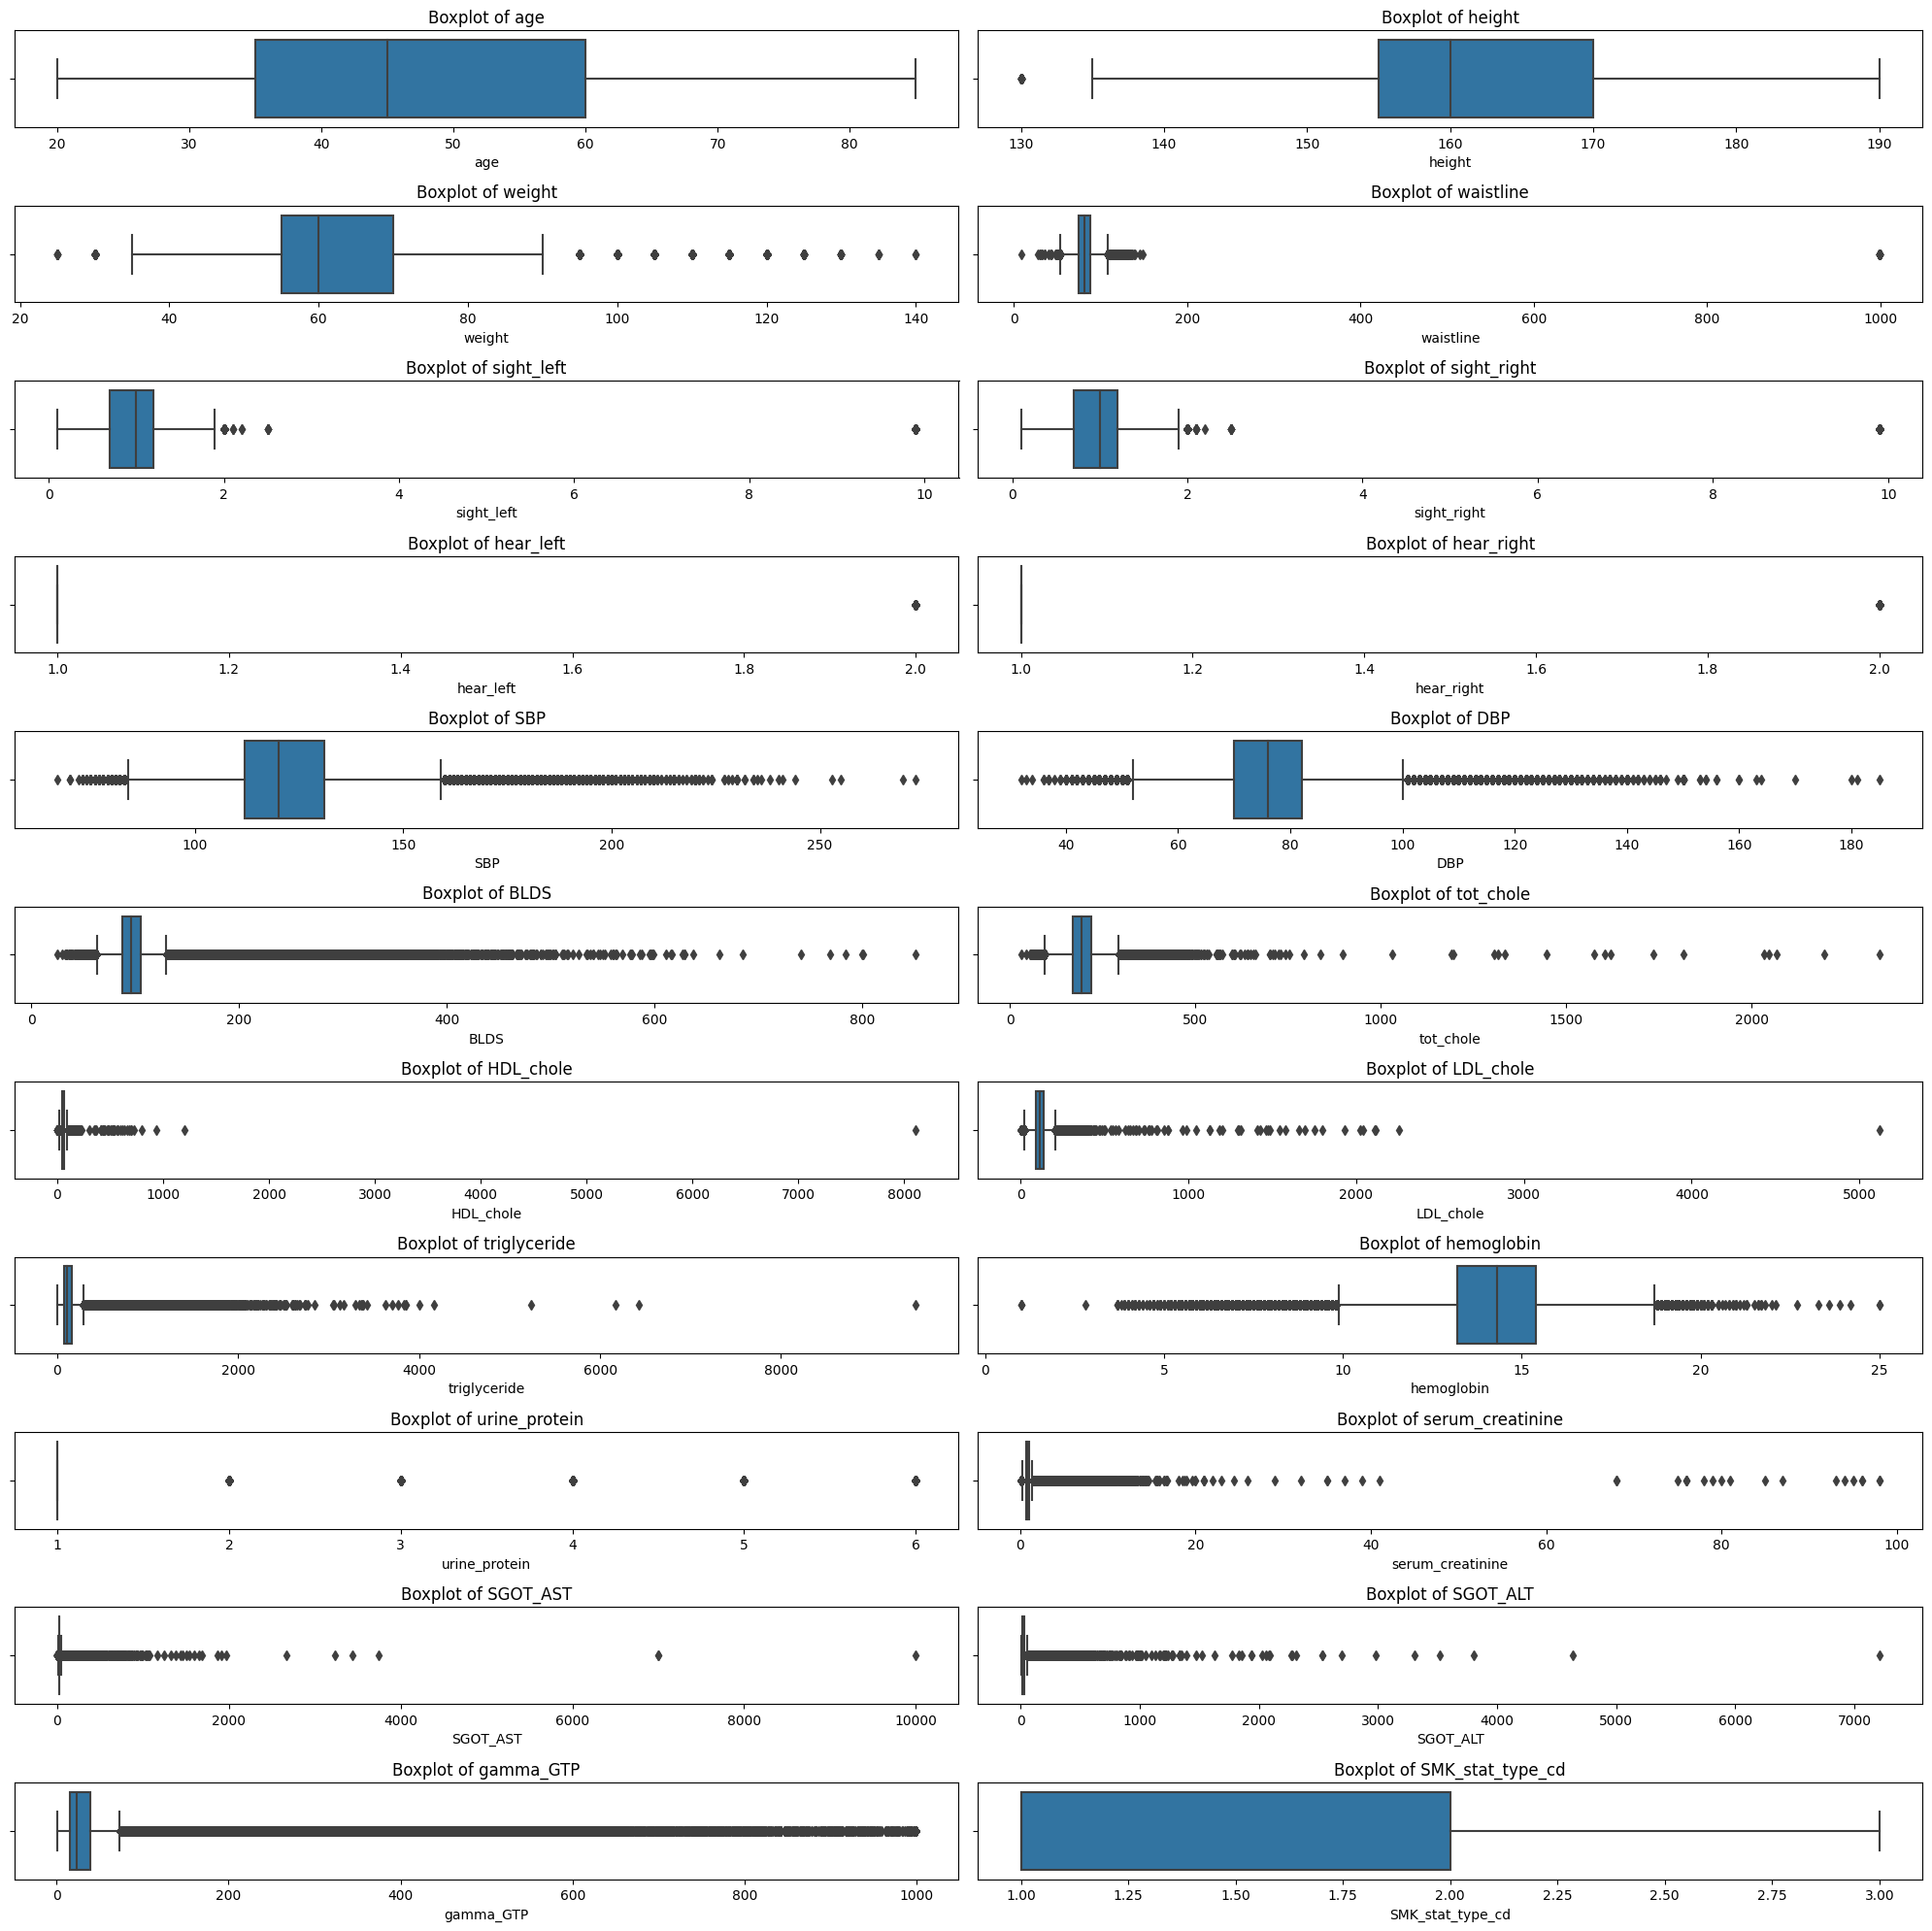

In [ ]:
plot_boxplots(df_ori)

## korelasi fitur

<ipython-input-33-331eb7d9c774>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ori.corr(), annot=True)


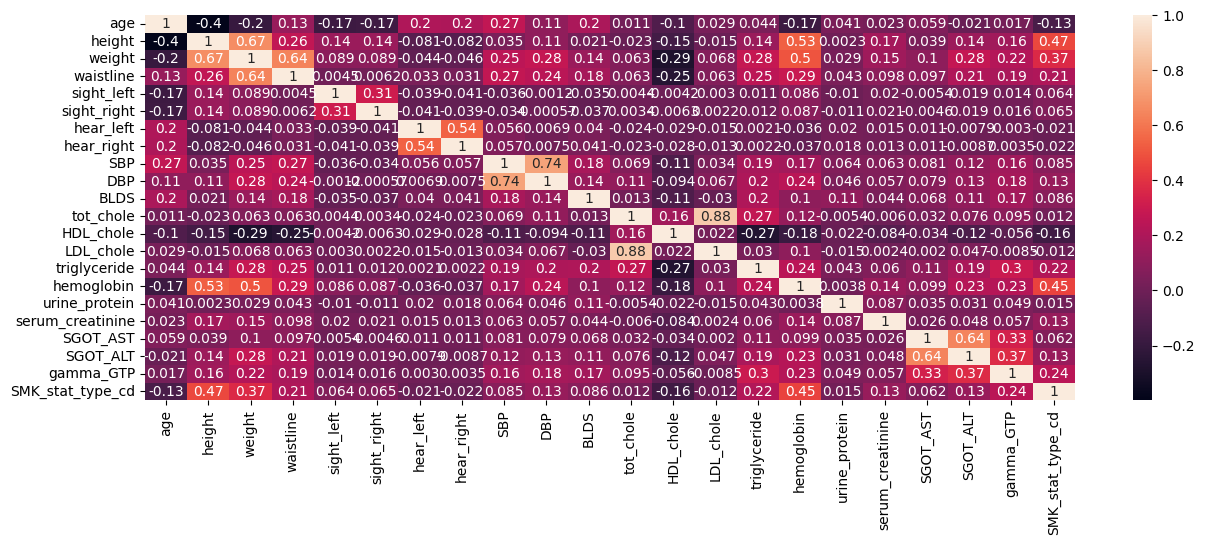

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_ori.corr(), annot=True)
plt.show()

In [ ]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

## Statistics

In [ ]:
df_ori.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


## no missing value

In [ ]:
df_ori.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

<Axes: >

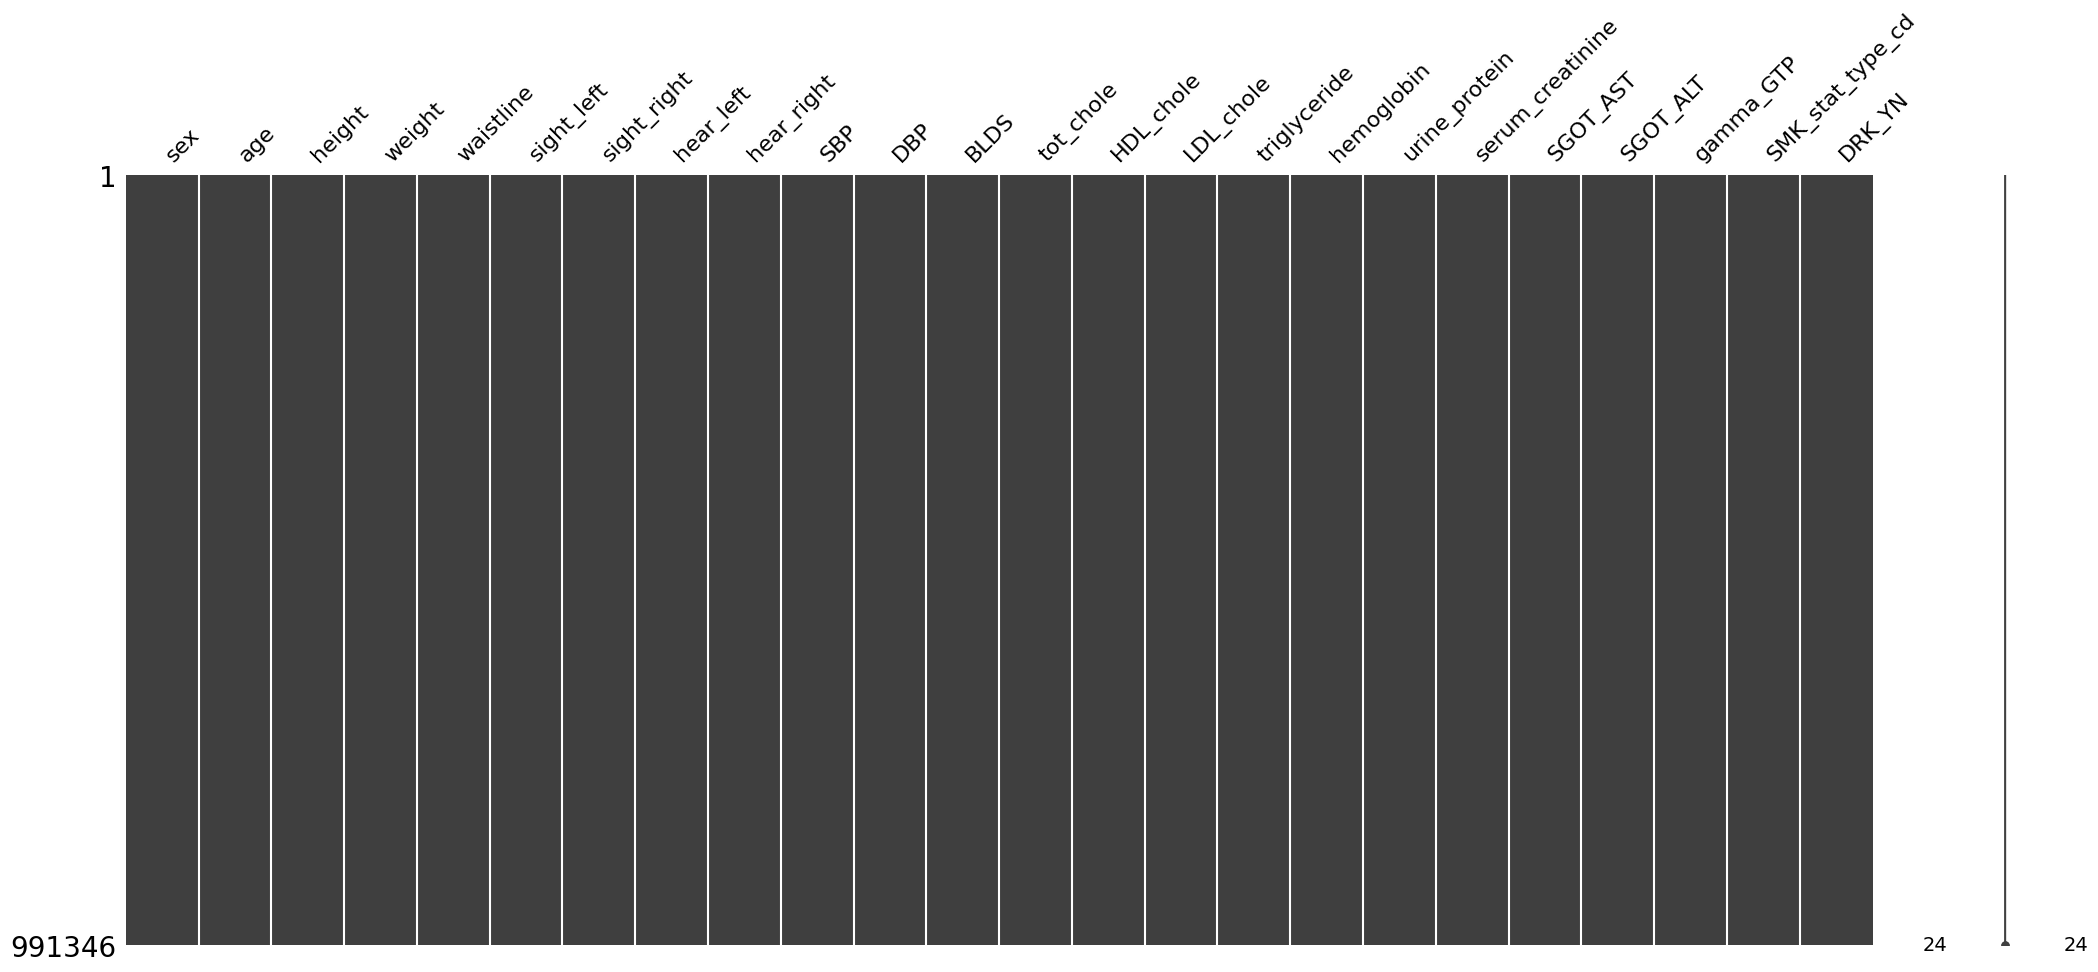

In [ ]:
import missingno as msno
msno.matrix(df_ori)  # just to visualize. no missing value.

## duplikat data

In [ ]:
# melihat duplikat
df_ori[df_ori.duplicated()]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
159911,Female,40,170,85,88.0,0.9,0.9,1.0,1.0,120.0,...,121.0,115.0,10.4,1.0,0.9,17.0,14.0,33.0,1.0,N
175152,Male,65,170,75,101.1,0.6,0.7,1.0,1.0,130.0,...,109.0,140.0,17.1,1.0,1.0,24.0,31.0,26.0,3.0,N
246305,Female,50,155,70,90.8,1.0,1.0,1.0,1.0,150.0,...,150.0,183.0,14.9,1.0,0.8,24.0,22.0,42.0,1.0,N
280830,Male,45,170,75,86.4,1.2,0.7,1.0,1.0,150.0,...,122.0,499.0,14.9,1.0,0.8,23.0,11.0,342.0,3.0,Y
284528,Female,65,150,55,86.0,0.9,0.9,1.0,1.0,120.0,...,139.0,136.0,11.9,1.0,0.7,27.0,18.0,14.0,1.0,N
290463,Female,20,160,50,70.0,1.0,1.0,1.0,1.0,106.0,...,98.0,56.0,12.7,1.0,0.8,18.0,13.0,11.0,1.0,N
335747,Male,50,180,95,101.0,1.5,1.5,1.0,2.0,177.0,...,120.0,105.0,15.0,3.0,0.9,19.0,27.0,61.0,3.0,Y
429596,Male,75,160,60,83.0,1.2,0.7,1.0,1.0,105.0,...,150.0,82.0,16.0,2.0,1.1,27.0,22.0,26.0,1.0,N
453451,Male,35,170,65,85.0,0.9,1.2,1.0,1.0,130.0,...,80.0,126.0,14.7,1.0,0.9,14.0,13.0,10.0,2.0,Y
471596,Female,45,165,65,82.0,1.0,1.0,1.0,1.0,120.0,...,103.0,53.0,13.6,1.0,0.5,17.0,19.0,28.0,1.0,N


# Preprocessing Data

Ada duplikat dalam data, sehingga perlu dihilangkan. Hal ini juga akan meningkatkan kualitas data dan mengurangi kemungkinan overfitting model.

In [ ]:
# membuat salinan untuk dataset yang asli
df = df_ori.copy()

## Hapus duplikat data

In [ ]:
# Hapus duplikat data
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [ ]:
df.shape

(991320, 24)

## Ubah data kategori ke numerik

In [ ]:
df['DRK_YN'] = df['DRK_YN'].replace({'Y':1,'N':0})
df['sex'] = df['sex'].replace({'Male':1,'Female':0})

In [ ]:
df.tail(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0
991345,1,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0,1


## Handling outlier dengan IQR (Interquartil Range)

fungsi untuk menghilangkan outlier dalam data. Fungsi tersebut menggunakan metode rentang interkuartil (IQR) untuk menentukan batas outlier dan mengganti nilai pada kolom yang melampaui batas tersebut dengan nilai batas terdekat.

In [ ]:
def remove_outliers(df, columns, k=1.5):
    """
Fungsi untuk menghapus outlier dari kolom data yang ditentukan.

    Parameters:
    df (pandas.DataFrame): dataset asli
    columns (list): daftar kolom untuk menghapus outlier
    k (float): koefisien untuk menghitung batas range
    """
    for column in columns:
        # Hitung kuartil pertama dan ketiga
        q1 = df[column].quantile(0.25) # menemukan 25 nilai terkecil
        q3 = df[column].quantile(0.75) # menemukan 25 nilai terbesar

        # Hitung rentang interquartile (selisih antara nilai terbesar dan terkecil)
        iqr = q3 - q1

        #Replace nilai di luar rentang [q1 * qr, q3 + k * ir] dengan nilai boundary
        #clip -digunakan untuk memotong nilai
        #lower: minimum value for cropping. If the value of the element is less than lower, it is replaced by lower.
        #upper: maximum value for cropping. If the value of the element is greater than upper, it is replaced by upper.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [ ]:
remove_outliers(df,['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT'],k=1.5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,41.5,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


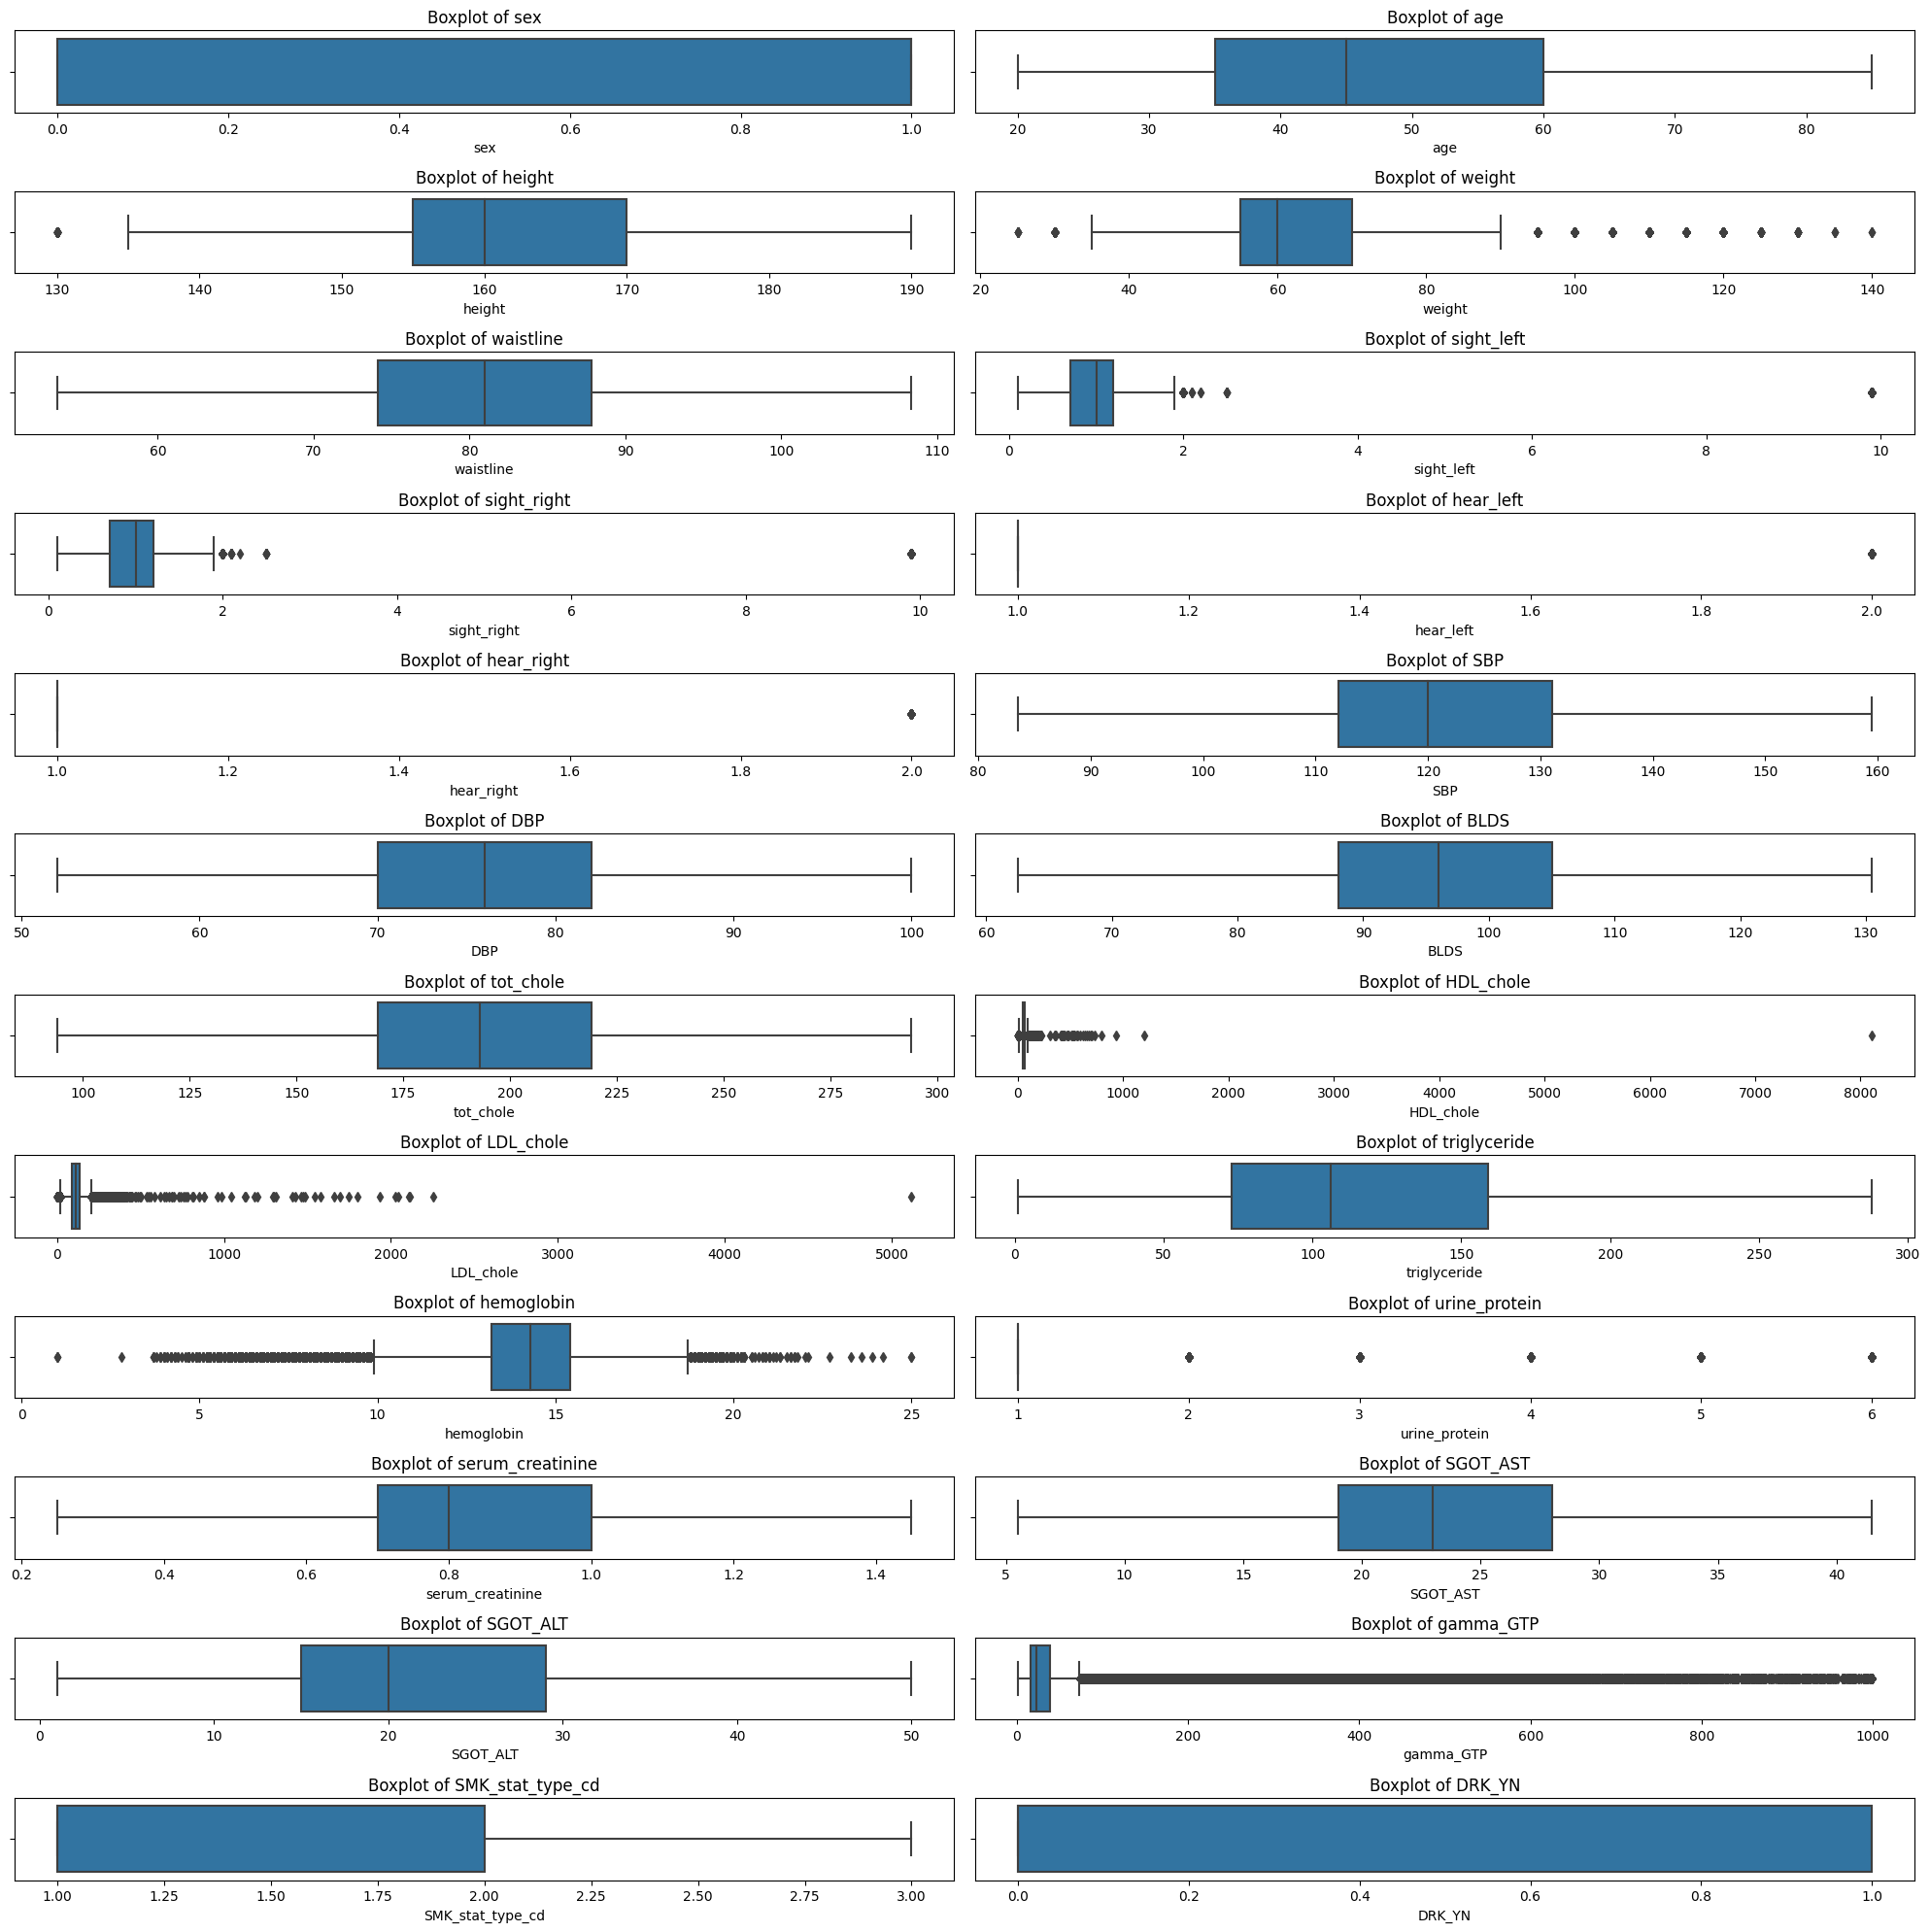

In [ ]:
plot_boxplots(df)

In [ ]:
X = df.drop(columns="DRK_YN", axis=1) # menghapus kolom target/kunci jawaban/ test
y = df.DRK_YN # ini target

In [ ]:
X.tail(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0
991345,1,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,39.0,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0


In [ ]:
y.tail(3)

991343    1
991344    0
991345    1
Name: DRK_YN, dtype: int64

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(991320, 23) (693924, 23) (297396, 23)


## Scaling

In [ ]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

In [ ]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'sag')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7282209579146995


In [ ]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,criterion= "gini",n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7349594480087156


In [ ]:
# 3. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7357361901303313


In [ ]:
# 4. XGB Classifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb_model = XGBClassifier(booster='gbtree', eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGB Accuracy: 0.7390953476173183


In [ ]:
# 5. LGBMClassifier
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print("LGBM Accuracy:", accuracy_score(y_test, y_pred_clf))



[LightGBM] [Info] Number of positive: 346833, number of negative: 347091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1915
[LightGBM] [Info] Number of data points in the train set: 693924, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499814 -> initscore=-0.000744
[LightGBM] [Info] Start training from score -0.000744
LGBM Accuracy: 0.7395997256183674


In [ ]:
# 6. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.645607203862863


## saved model with pickle

In [ ]:
import pickle

In [ ]:
logreg_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_logreg', 'rb'))
y_pred_log = logreg_loaded.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7282243204347066


### open model

In [ ]:
logreg_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_logreg', 'rb'))
rf_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_rf', 'rb'))
gb_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_gb', 'rb'))
xgb_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_xgb', 'rb'))
lgbm_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_lgbm', 'rb'))
dt_loaded = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/saved_model/model_dt', 'rb'))

### load model

In [ ]:
y_pred_log = logreg_loaded.predict(X_test)
y_pred_rf = rf_loaded.predict(X_test)
y_pred_gb = gb_loaded.predict(X_test)
y_pred_xgb = xgb_loaded.predict(X_test)
y_pred_lgbm = lgbm_loaded.predict(X_test)
y_pred_dt = dt_loaded.predict(X_test)

# Performa Model

## LR

In [ ]:
# Testing Performance
print("Classification report for - \n{}:\n{}\n".format(
    logreg_loaded, metrics.classification_report(y_test, y_pred_log)))

test_acc = metrics.accuracy_score(y_test, y_pred_log)*100
print("Testing accuracy: " + str(test_acc))

Classification report for - 
LogisticRegression(solver='sag'):
              precision    recall  f1-score   support

           0       0.72      0.74      0.73    148753
           1       0.73      0.72      0.73    148643

    accuracy                           0.73    297396
   macro avg       0.73      0.73      0.73    297396
weighted avg       0.73      0.73      0.73    297396


Testing accuracy: 72.82243204347067


## RF

In [ ]:
# Testing Performance
print("Classification report for - \n{}:\n{}\n".format(
    rf_loaded, metrics.classification_report(y_test, y_pred_rf)))

test_acc = metrics.accuracy_score(y_test, y_pred_rf)*100
print("Testing accuracy: " + str(test_acc))

Classification report for - 
RandomForestClassifier(n_estimators=150, n_jobs=-1):
              precision    recall  f1-score   support

           0       0.74      0.73      0.73    148753
           1       0.73      0.74      0.74    148643

    accuracy                           0.73    297396
   macro avg       0.73      0.73      0.73    297396
weighted avg       0.73      0.73      0.73    297396


Testing accuracy: 73.49594480087156


## GB

In [ ]:
# Testing Performance
print("Classification report for - \n{}:\n{}\n".format(
    gb_loaded, metrics.classification_report(y_test, y_pred_gb)))

test_acc = metrics.accuracy_score(y_test, y_pred_gb)*100
print("Testing accuracy: " + str(test_acc))

Classification report for - 
GradientBoostingClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.74      0.72      0.73    148753
           1       0.73      0.75      0.74    148643

    accuracy                           0.74    297396
   macro avg       0.74      0.74      0.74    297396
weighted avg       0.74      0.74      0.74    297396


Testing accuracy: 73.57361901303314


## XGB

In [ ]:
# Testing Performance
print("Classification report for - \n{}:\n{}\n".format(
    xgb_loaded, metrics.classification_report(y_test, y_pred_xgb)))

test_acc = metrics.accuracy_score(y_test, y_pred_xgb)*100
print("Testing accuracy: " + str(test_acc))

Classification report for - 
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...):
              precision    recall  f1-score   support

           0       0.74      0.74      0.74    148753
           1       0.74      0.74      0.74    148643

    accuracy                           

## LGBM

In [ ]:
# Testing Performance
print("Classification report for - \n{}:\n{}\n".format(
    lgbm_loaded, metrics.classification_report(y_test, y_pred_lgbm)))

test_acc = metrics.accuracy_score(y_test, y_pred_lgbm)*100
print("Testing accuracy: " + str(test_acc))

Classification report for - 
LGBMClassifier():
              precision    recall  f1-score   support

           0       0.74      0.73      0.74    148753
           1       0.74      0.75      0.74    148643

    accuracy                           0.74    297396
   macro avg       0.74      0.74      0.74    297396
weighted avg       0.74      0.74      0.74    297396


Testing accuracy: 73.95997256183674


## DT

In [ ]:
# Testing Performance
print("Classification report for - \n{}:\n{}\n".format(
    dt_loaded, metrics.classification_report(y_test, y_pred_dt)))

test_acc = metrics.accuracy_score(y_test, y_pred_dt)*100
print("Testing accuracy: " + str(test_acc))

Classification report for - 
DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.65      0.65      0.65    148753
           1       0.65      0.65      0.65    148643

    accuracy                           0.65    297396
   macro avg       0.65      0.65      0.65    297396
weighted avg       0.65      0.65      0.65    297396


Testing accuracy: 64.56072038628629


# Confusion Matrix

In [ ]:
cm_logreg = metrics.confusion_matrix(y_test, y_pred_log)
cm_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cm_gb = metrics.confusion_matrix(y_test, y_pred_gb)
cm_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)
cm_lgbm = metrics.confusion_matrix(y_test, y_pred_lgbm)
cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)

## LR

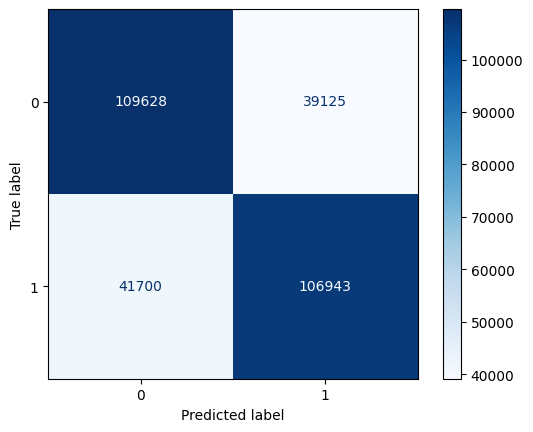

In [ ]:
cm_display_logreg = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_logreg)
cm_display_logreg.plot(cmap='Blues')
plt.grid(False)
plt.show()

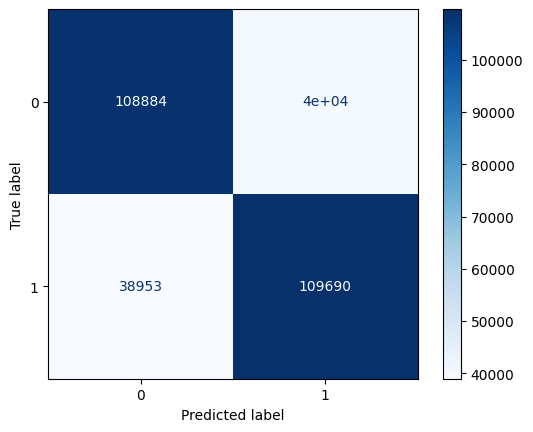

In [ ]:
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf)
cm_display_rf.plot(cmap='Blues')
plt.grid(False)
plt.show()

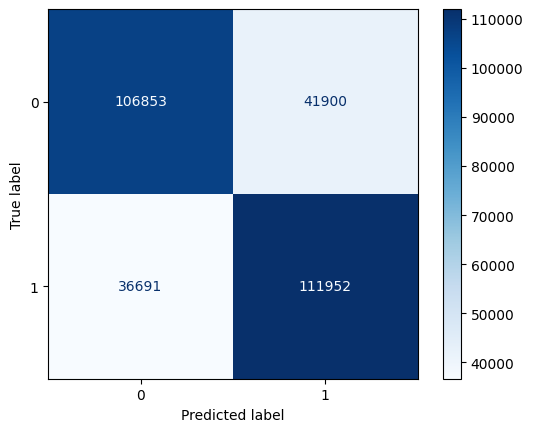

In [ ]:
cm_display_gb = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_gb)
cm_display_gb.plot(cmap='Blues')
plt.grid(False)
plt.show()

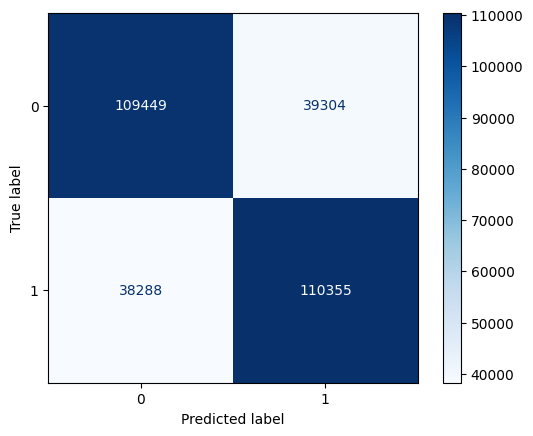

In [ ]:
cm_display_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_xgb)
cm_display_xgb.plot(cmap='Blues')
plt.grid(False)
plt.show()

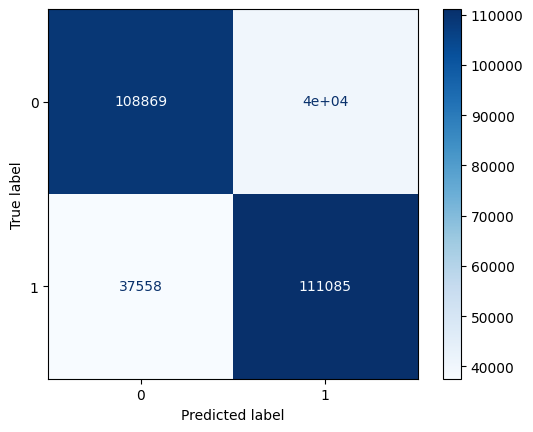

In [ ]:
cm_display_lgbm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lgbm)
cm_display_lgbm.plot(cmap='Blues')
plt.grid(False)
plt.show()

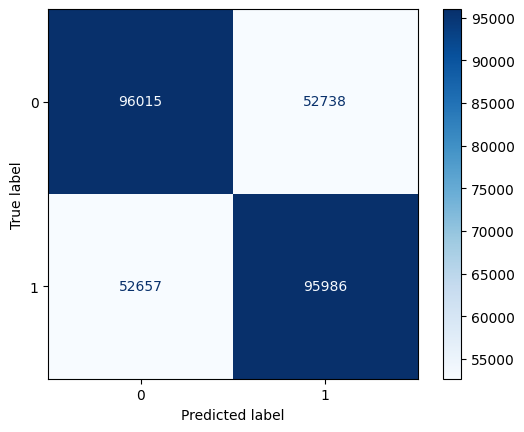

In [ ]:
cm_display_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_dt)
cm_display_dt.plot(cmap='Blues')
plt.grid(False)
plt.show()